In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt



In [3]:
n = 20
x = np.zeros((n,))
y = np.zeros((n,))
#for i in range(n):
   #x[i] = np.random.random() * 6 - 3# от -1 до 1
x=np.random.random(size=(n, )) * 6 - 3
x = np.sort(x, axis = 0)

In [4]:
y = 3 - 3.5*x - 4.2*x**2 + 3.67*x**3 - 2.11*x**4 + 1.8*x**5 + np.random.normal(0,50,n)#ошибка из норм распредления, 50 - std

In [11]:
x.reshape(-1,1)

array([[-2.88552817],
       [-2.31103675],
       [-2.30972433],
       [-1.79372256],
       [-1.43679447],
       [-1.10738069],
       [-0.30662422],
       [-0.02991795],
       [ 0.62906822],
       [ 0.95806036],
       [ 1.01511894],
       [ 1.03044286],
       [ 1.65498642],
       [ 1.70978503],
       [ 1.88098553],
       [ 2.03723668],
       [ 2.23579094],
       [ 2.51772847],
       [ 2.74758247],
       [ 2.9924127 ]])

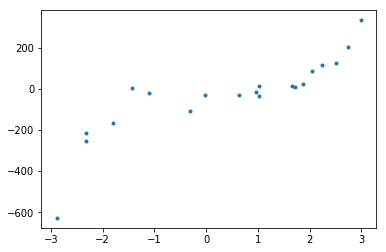

In [10]:
x = x.reshape(-1,1)
plt.plot(x,y,'o', markersize=3)
#plt.show()

In [6]:
deg = 2
pol = PolynomialFeatures(degree=deg)
x_pol = pol.fit_transform(X = x)
model = LinearRegression()#fit_intercept - учитывать b0 или нет
model.fit(x_pol,y)#обучить модель


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
x.min()

-2.8855281671756696

[  0.          84.28779313 -20.67551455] 64.89636323693438


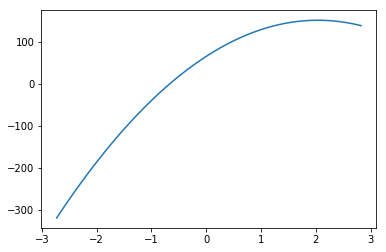

In [38]:
regression_x = np.linspace(x.min(), x.max(), 1001)#1000 равномерных интервалов
regression_x = regression_x.reshape(-1,1)
regression_x_pol = pol.transform(X = regression_x)
regression_y = model.predict(regression_x_pol)

plt.plot(regression_x,regression_y)
print(model.coef_,model.intercept_)
plt.show()

?????????????????????????????????????????????????????/
где точки лул?

[-1.87611728 -1.87165079 -1.8671843  ...  2.58143922  2.58590571
  2.59037219]


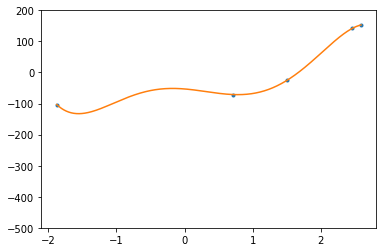

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet#У всех методов есть вариант с CrossValidation - LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

n = 5
x = np.zeros((n, ))
y = np.zeros((n, ))

x = np.random.random(size = (n, )) * 6 - 3
x = np.sort(x, axis=0)

y = 3 - 3.5*x - 4.2*x**2 + 3.67*x**3 - 2.11*x**4 + 1.8*x**5 + np.random.normal(0, 50, n) 
x = x.reshape(-1, 1)

plt.plot(x, y, 'o', markersize=3)


deg = 5
pol = PolynomialFeatures(degree=deg)
x_pol = pol.fit_transform(X=x)

model = LinearRegression()
#model = Ridge(alpha=1)
#model = Lasso(alpha = 0.1)
model.fit(x_pol, y)

regression_x = np.linspace(x.min(), x.max(), 1001)
print(regression_x)
regression_x = regression_x.reshape(-1, 1)
regression_x_pol = pol.transform(X=regression_x)
regression_y = model.predict(regression_x_pol)

plt.plot(regression_x,regression_y)
plt.ylim(-500,200)
#print(model.coef_, model.intercept_)
plt.show()

регрессионная кривая очень далека от реальной кривой в точках, не совпадающих с данными

Слишком подогнали модель. Надо 5, а взяли 25. На новых данных предсказание будет отстой

Не находит паттерны в данных, а подлаживает себя под данные